In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca Data Set

In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:

# cek baris yang masih bukan angka
print(df[pd.to_numeric(df["bmi"], errors="coerce").isna()][["bmi"]].head(10))
print(df[pd.to_numeric(df["charges"], errors="coerce").isna()][["charges"]].head(10))


Empty DataFrame
Columns: [bmi]
Index: []
Empty DataFrame
Columns: [charges]
Index: []


# DATA EXPLORATION

In [6]:
#cek jumlah kolom dan baris pada dataset
rows, colums = df.shape
print(f"Jumlah Baris : {rows}")
print(f"Jumlah Kolom : {colums}")

Jumlah Baris : 1338
Jumlah Kolom : 7


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

### Cek Konsistensi

In [11]:
# Cek konsistensi variabel categorical
cat_cols = df.select_dtypes(include=["object"]).columns

cat_values = []

for col in cat_cols:
    cat_values.append({
        "column" : col,
        "unique_values" : df[col].dropna().unique().tolist(),
        "n_unique" : df[col].nunique(dropna=True)
    })

cat_values_df = pd.DataFrame(cat_values)

pd.set_option("display.max_colwidth", None)
cat_values_df

,column,unique_values,n_unique
0,sex,"[female, male]",2
1,smoker,"[yes, no]",2
2,region,"[southwest, southeast, northwest, northeast]",4


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


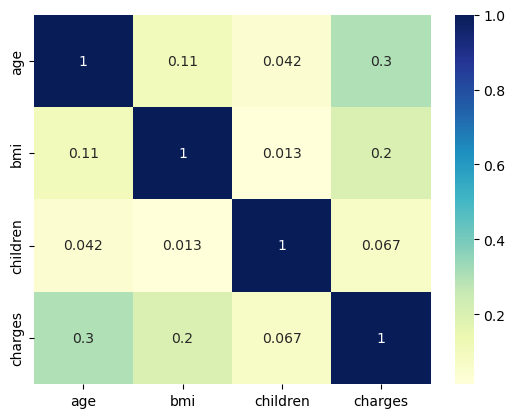

In [12]:
# Korelasi antar variabel numerik
co_mtx = df.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

### Cek Tipe Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### Distribusi & Outlier

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


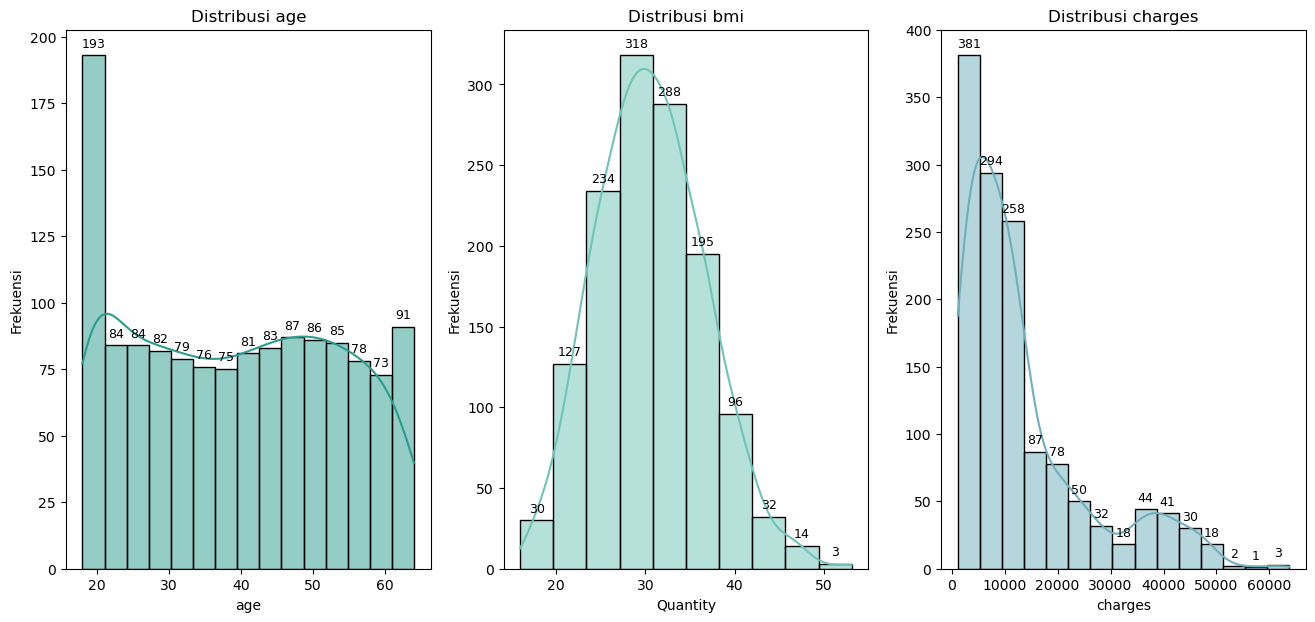

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,7))  

# Fungsi tambah label frekuensi
def add_hist_labels(ax):
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.text(
                p.get_x() + p.get_width()/2,
                h + (ax.get_ylim()[1]*0.01), 
                f'{int(h)}',
                ha='center', va='bottom',
                fontsize=9
            )

# Distribusi age
sns.histplot(df["age"], bins=15, kde=True, color="#2A9D8F", ax=axes[0])

axes[0].set_title("Distribusi age")
axes[0].set_xlabel("age")
axes[0].set_ylabel("Frekuensi")
axes[0].grid(False)
add_hist_labels(axes[0])


# Distribusi bmi
sns.histplot(df["bmi"], bins=10, kde=True, color="#6EC4B8", ax=axes[1])

axes[1].set_title("Distribusi bmi")
axes[1].set_xlabel("Quantity")
axes[1].set_ylabel("Frekuensi")
axes[1].grid(False)
add_hist_labels(axes[1])

# Distribusi charges
sns.histplot(df["charges"], bins=15, kde=True, color="#6FAFBC", ax=axes[2])

axes[2].set_title("Distribusi charges")
axes[2].set_xlabel("charges")
axes[2].set_ylabel("Frekuensi")
axes[2].grid(False)
add_hist_labels(axes[2])

# plt.tight_layout()
# plt.show()


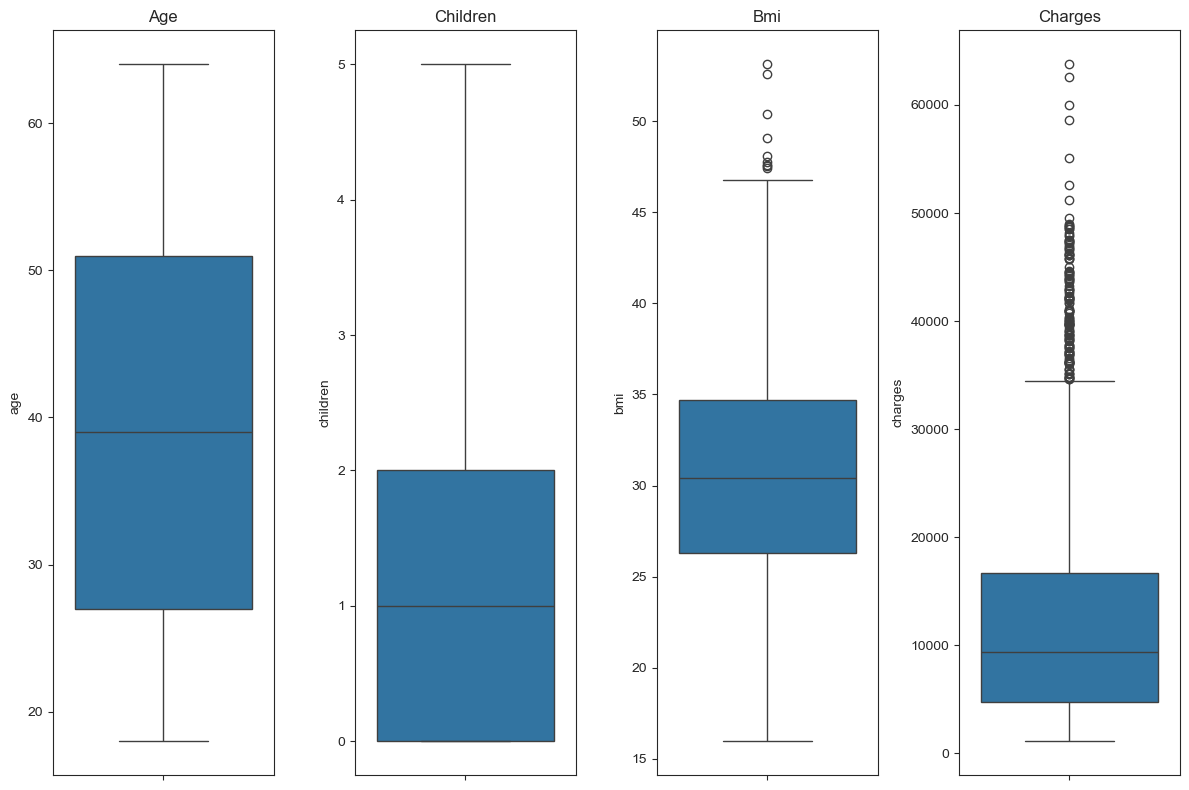

In [16]:
sns.set_style('ticks')

fig, axes = plt.subplots(1, 4, figsize=(12,8))

for ax, col in zip(axes, ['age', 'children', 'bmi', 'charges']):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col.capitalize())

plt.tight_layout()
plt.show()

In [17]:
# Menghitung Q1,Q3, dan IQR untuk kolom bmi

Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengecek Jumlah Outlier
outlier_bmi = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]

# Menampilkan Output
print("Batas bawah:", lower_bound)
print("Batas atas :", upper_bound)
print("Jumlah Outlier BMI:", len(outlier_bmi))

Batas bawah: 13.674999999999994
Batas atas : 47.31500000000001
Jumlah Outlier BMI: 9


In [18]:
Q1_bmi = df["bmi"].quantile(0.25)
Q3_bmi = df["bmi"].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bmi = Q3_bmi + 1.5 * IQR_bmi

outlier_bmi = df[(df["bmi"] < lower_bmi) | (df["bmi"] > upper_bmi)]

print("bmi")
print("Q1:", Q1_bmi)
print("Q3:", Q3_bmi)
print("IQR:", IQR_bmi)
print("Lower Bound:", lower_bmi)
print("Upper Bound:", upper_bmi)
print("Total Outliers:", outlier_bmi.shape[0])

bmi
Q1: 26.29
Q3: 34.7
IQR: 8.410000000000004
Lower Bound: 13.674999999999994
Upper Bound: 47.31500000000001
Total Outliers: 9


Meskipun terdapat outlier pada variabel BMI, tidak dilakukan penanganan data seperti penghapusan atau transformasi. Hal ini dikarenakan nilai BMI ekstrem masih mencerminkan kondisi nyata dalam populasi, misalnya individu dengan obesitas berat atau kondisi kekurangan berat badan yang signifikan.

In [19]:
Q1_charges = df["charges"].quantile(0.25)
Q3_charges = df["charges"].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges

lower_charges = Q1_charges - 1.5 * IQR_charges
upper_charges = Q3_charges + 1.5 * IQR_charges

outlier_charges = df[
    (df["charges"] < lower_charges) | (df["charges"] > upper_charges)
]

print("CHARGES")
print("Q1:", Q1_charges)
print("Q3:", Q3_charges)
print("IQR:", IQR_charges)
print("Lower Bound:", lower_charges)
print("Upper Bound:", upper_charges)
print("Total Outliers:", outlier_charges.shape[0])

CHARGES
Q1: 4746.344
Q3: 16657.71745
IQR: 11911.37345
Lower Bound: -13120.716174999998
Upper Bound: 34524.777625
Total Outliers: 139


In [20]:
# Menghitung Q1,Q3, dan IQR untuk kolom charges

Q1 = df["charges"].quantile(0.25)
Q3 = df["charges"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengecek Jumlah Outlier
outlier_charges = df[(df["charges"] < lower_bound) | (df["charges"] > upper_bound)]

# Menampilkan Output
print("Batas bawah:", lower_bound)
print("Batas atas :", upper_bound)
print("Jumlah Outlier Charges:", len(outlier_charges))

Batas bawah: -13120.716174999998
Batas atas : 34524.777625
Jumlah Outlier Charges: 139


Meskipun terdapat outlier, tidak dilakukan penanganan (handling) terhadap data tersebut. Hal ini dikarenakan nilai charges yang ekstrem masih merepresentasikan kondisi nyata, seperti biaya kesehatan yang sangat tinggi akibat perawatan intensif atau kasus medis tertentu.

In [21]:
# simpan data siap Tableau
df.to_csv("insurance_final.csv", index=False)